<a href="https://colab.research.google.com/github/near731/Sziltan/blob/main/szilhf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Szilárdságtan HF1 megoldó

1.feladatrész: 

Ax= 4 kN
Bz= 1.67840909090909 kN
Az= 0.796590909090909 kN
B= 1.67840909090909 kN
A= 4.07854840310205 kN

2.feladatrész: 

NGz= -0.688223140495868 kN
N3Cz= 0.990185950413223 kN
NGx=NBx=NBz= -0.688223140495868 kN
N3Cx= -0.311776859504132 kN
N3Bx= -0.688223140495868 kN
N3Bz= 0.990185950413223 kN

3.feladatrész: 

Igénybevételi függvények:

Piecewise((-4, x <= 0.3), (-4.68822314049587, x <= 0.55), (-1.68822314049587, x <= 0.85))
Piecewise((0.796590909090909, x <= 0.3), (2.83481404958678 - 4.5*x, x <= 0.85))
Piecewise((-0.796590909090909*x, x <= 0.3), (-1.48481404958678*x + 2.25*(x - 0.3)**2 + 0.20646694214876, x <= 0.55), (-1.48481404958678*x + 2.25*(x - 0.3)**2 + 0.58146694214876, x <= 0.85))

Igénybevételi ábrák:



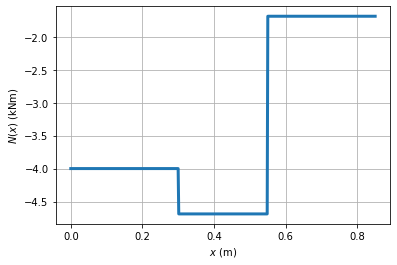

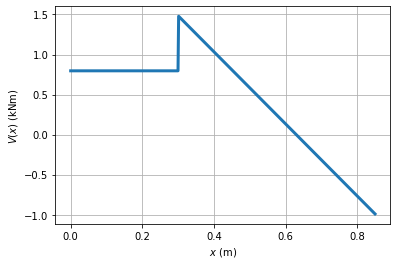

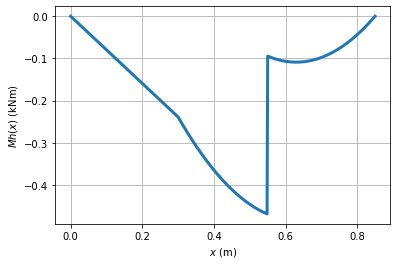


4.feladatrész: 

Mhmax= -0.469555785123967 kNm
Kymin= 469.555785123967 mm4
b= 9.93268964172281 mm

Iy= 4663.95188311185 mm4

6.feladatrész

Vmax= 1.48481404958678 kN

Txz1: -0.000159179820761368*(9.93268964172281 - z)*(z + 9.93268964172281) kN
Txz2: -0.000159179820761368*(7.44951723129211 - z)*(z + 7.44951723129211) - 0.0035574384529074*(9.93268964172281 - z)*(z + 9.93268964172281) kN


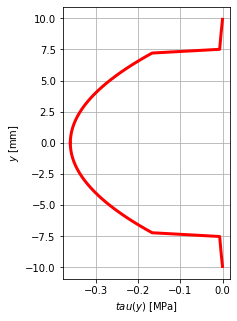

Maximum feszültség: -0.356920300525173 MPa

Nphi= -940.130293389662 N
Vphi= -251.907152893794 N
Mhphi= 62.9767882234486 Nm

Ak= 1963.49540849362 mm2
Iky= 306796.157577128 mm4

σNz= -0.478804426698875 MPa
σMhz= 51.3181037865641*z/(z + 250.0) + 0.12829525946641 MPa

σkz= Piecewise((51.3181037865641*z/(z + 250.0) - 0.350509167232465, z < 25)) MPa


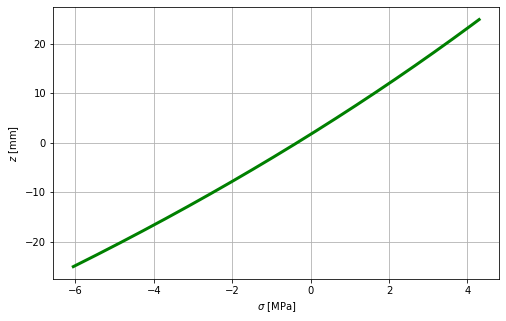

A 0 pontban adodó feszültség: 51.3181037865641*z/(z + 250.0) - 0.350509167232465 MPa
A -d/2 pontban adodó feszültség: -6.05252069907292 MPa
A d/2 pontban adodó feszültség: 4.31477299518246 MPa

9.feladatrész:

MhC= -125.000000000000 Nm
Ity= 1259712 mm4
Itz= 139968 mm4
Ityz= 209952 mm4

It1= 1297783.55811230 mm4
It2= 101896.441887698 mm4
alfa= -0.1793853351352861 rad

Mszi= -122.994193764414 Nm
Meta= 22.3031006867171 Nm
σeta= -0.218880073470061*szi MPa
σszi= 0.0947725011582945*eta MPa
σt= 0.0947725011582945*eta - 0.218880073470061*szi MPa

σA= 7.14202377717255 MPa
σB= -8.01669660477344e-5 MPa
σC= 6.68980958313505 MPa
phi= 1.162179058382615 rad

βzerus= 0.980844476610105 rad
βzerus= 56.1982488684772 fok


In [50]:
import numpy as np
import sympy as sp
import math

print("Szilárdságtan HF1 megoldó\n")

R,L,d,c,F1,F2,p,szigma_meg=sp.symbols("R,L,d,c,F1,F2,p,szigma_meg")

#ADATOK

R_adat=0.25 #m
L_adat=0.3 #m
d_adat=50 #mm
c_adat=36 #mm
F1_adat=3 #kN
F2_adat=1 #kN
p_adat=4.5 #Kn/m
szigma_meg_adat=100 #MPa

adatok= [(R,R_adat),(L,L_adat),(d,d_adat),(c,c_adat),(F1,F1_adat),(F2,F2_adat),(p,p_adat),(szigma_meg,szigma_meg_adat)]

#REAKCIÓERŐK SZÁMITÁSA (BIZTOS JÓ)

print("1.feladatrész: \n")

Ax=F1+F2
Axn=Ax.subs(adatok)
print("Ax=",Axn,"kN")

Bz=(1/(R+L))*(p*(R+L)*(L+((R+L)/2))-F1*(R/2)-F2*(R/2))
Bzn=Bz.subs(adatok)
print("Bz=",Bzn,"kN")

Az=p*(R+L)-Bz
Azn=Az.subs(adatok)
print("Az=",Azn,"kN")

B=Bzn
print("B=",B,"kN")
A=(Ax**2+Az**2)**(1/2)
An=A.subs(adatok)
print("A=",An,"kN")

#NBx=NBz=NGx=NGz

#NGz=Az+NCz-p*(R+L)
#NGx=Ax-F1+NCx

#VALAMI FÉLRE SZÁMOLÁS VAN ITT

print("\n2.feladatrész: \n")

NGz=(1/(-L-R))*(F1*(R/2)-p*(L+R)*(L+(L+R)/2)+(2*L+R)*(p*(L+R)-Az))
NGzn=NGz.subs(adatok)
print("NGz=",NGzn,"kN") #JÓ

N3Cz=NGz+p*(L+R)-Az
N3Czn=N3Cz.subs(adatok)
print("N3Cz=",N3Czn,"kN") #JÓ

NGx=NGzn
NBx=NGx
NBz=NGx
print("NGx=NBx=NBz=",NGx,"kN")

N3Cx=F1-NGz-Ax
N3Cxn=N3Cx.subs(adatok)
print("N3Cx=",N3Cxn,"kN")

N3Bx=-F2-N3Cx
N3Bxn=N3Bx.subs(adatok)
print("N3Bx=",N3Bxn,"kN")

N3Bz=N3Cz
N3Bzn=N3Bz.subs(adatok)
print("N3Bz=",N3Bzn,"kN")

#IGÉNYBEVÉTELI FÜGGVÉNYEK

print("\n3.feladatrész: \n")
print("Igénybevételi függvények:\n")

x=sp.symbols("x")

N=sp.Piecewise((-Ax, x<=L), (-Ax+NGx, x<=L+R), (-Ax+NGx+F1, x<=2*L+R))
V=sp.Piecewise((Az,x<=L),(Az-NGz-p*(x-L),x<=2*L+R))
Mh=sp.Piecewise((-Az*x, x<=L), (-Az*x+NGz*(x-L)+p*((x-L)**2)/2, x<=R+L),(F1*(R/2)-Az*x+NGz*(x-L)+p*((x-L)**2)/2, x<=2*L+R))

Nn=N.subs(adatok)
Vn=V.subs(adatok)
Mhn=Mh.subs(adatok)

print(Nn)
print(Vn)
print(Mhn)

#IGÉNYBEVÉTELI ÁBRÁK

import matplotlib.pyplot as plt
from numpy import linspace

print("\nIgénybevételi ábrák:\n")

L0=(2*L+R).subs(adatok)
xs=linspace(0.,float(L0),500)
    

Nxs=[Nn.subs(x,xi) for xi in xs]
Vxs=[Vn.subs(x,xi) for xi in xs]
Mhxs=[Mhn.subs(x,xi) for xi in xs]

plt.plot(xs, Nxs, lw=3)
plt.xlabel("$x$ (m)")
plt.ylabel("$N(x)$ (kNm)")
plt.grid()
plt.show()


plt.plot(xs, Vxs, lw=3)
plt.xlabel("$x$ (m)")
plt.ylabel("$V(x)$ (kNm)")
plt.grid()
plt.show()

plt.plot(xs, Mhxs, lw=3)
plt.xlabel("$x$ (m)")
plt.ylabel("$Mh(x)$ (kNm)")
plt.grid()
plt.show()

#VESZÉLYES KERESZTMETSZET Mhmax, KERESZTMETSZETI TÉNYEZŐ MEGADÁSA

print("\n4.feladatrész: \n")

#t=0.55
Mhmax=-Az*(R+L)+NGz*(R)+p*((R)**2)/2
Mhmaxn=Mhmax.subs(adatok)

print("Mhmax=",Mhmaxn,"kNm")

Ky=(abs(Mhmax)/(1000*szigma_meg))*10**8
Kyn=Ky.subs(adatok)
print("Kymin=",Kyn,"mm4")

b=(48/23*Ky)**(1/3)
bn=b.subs(adatok)
print("b=",bn,"mm")

Iy=(b*(2*b)**3)/12-((2*b-b/2)**3*(b-b/3))/12
Iyn=Iy.subs(adatok)
print("\nIy=",Iyn,"mm4")

#print("Iy=",Iyn,"mm4")

#6.feladatrész

print("\n6.feladatrész")

Vmax=Az-NGz-p*(L-L)
Vmaxn=Vmax.subs(adatok)
print("\nVmax=",Vmaxn,"kN")

sp.init_printing()
z=sp.symbols("z")

#1.szakasz

Sy1z=b*(b-z)*(b+z)/2
Txz1=-(Vmax*Sy1z)/(Iy*b)
Txz1n=Txz1.subs(adatok)
print("\nTxz1:",Txz1n,"kN")
#2.szakasz

a2z=b/3
Sy2z=Sy1z*(3*b/4)+(b/3)*(3*b/4-z)*(3*b/4+z)/2
Txz2=-(Vmax*Sy2z)/(Iy*b/3)
Txz2n=Txz2.subs(adatok)
print("Txz2:",Txz2n,"kN")

#Ábrázolás
T=sp.Piecewise((Txz2, z<3*b/4), (Txz1, z<=b))
Tn=T.subs(adatok)
T.evalf(5)

zs=linspace(0,150,500)
Tz=[Tn.subs(z,zi) for zi in zs]

plt.figure(1,figsize=(3,5))
plt.plot(Tz, zs, 'r',lw=3)
plt.plot(Tz, -zs, 'r', lw=3)
plt.grid()
plt.xlabel("$tau(y)$ [MPa]")
plt.ylabel("$y$ [mm]")
plt.show()

Tmax=-(Vmax*(b*(b)*(b)/2)*(3*b/4)+(b/3)*(3*b/4)*(3*b/4)/2)/(Iy*b/3)
Tmaxn=Tmax.subs(adatok)
print("Maximum feszültség:",Tmaxn, "MPa")

#8.feladatrész

Nphi=NBx*np.cos(np.pi/6)+NBz*np.sin(np.pi/6)
Nphin=1000*Nphi.subs(adatok)

Vphi=NBz*np.cos(np.pi/6)-NBx*np.sin(np.pi/6)
Vphin=1000*Vphi.subs(adatok)

Mhphi=-NBz*R*np.sin(np.pi/6)+NBx*R*(1-np.cos(np.pi/6))
Mhphin=1000*Mhphi.subs(adatok)
Mhphimm=Mhphi*1000*1000

print("\nNphi=", Nphin, "N")
print("Vphi=", Vphin, "N")
print("Mhphi=", Mhphin, "Nm")

Ak=(d**2*np.pi/4)
Akn=Ak.subs(adatok)
print("\nAk=",Akn,"mm2")
Iky=(d**4*np.pi/64)
Ikyn=Iky.subs(adatok)
print("Iky=",Ikyn,"mm4")

σNz=1000*Nphi/Ak
σNzn=σNz.subs(adatok)
print("\nσNz=",σNzn,"MPa")

σMhz=(Mhphimm/(R*1000*Ak)+(Mhphimm/Iky*(R*1000)*z)/((R*1000)+z))
σMhzn=σMhz.subs(adatok)
print("σMhz=",σMhzn,"MPa")

σkz=sp.Piecewise((σMhz+σNz, z<d/2))
σkzn=σkz.subs(adatok)
print("\nσkz=",σkzn,"MPa")

zs=linspace(-d_adat/2,float(d_adat/2),500)
σkznz=[σkzn.subs(z,zi) for zi in zs]

plt.figure(1,figsize=(8,5))
plt.plot(σkznz, zs, 'g',lw=3)
plt.grid()
plt.xlabel("$σ$ [MPa]")
plt.ylabel("$z$ [mm]")
plt.show()

σkzn0=(Mhphimm/(R*1000*Ak)+(Mhphimm/Iky*(R*1000)*z)/((R*1000)+z)+1000*Nphi/Ak)
σkzn0n=σkzn0.subs(adatok)
print("A 0 pontban adodó feszültség:",σkzn0n,"MPa")

σkznmr=(Mhphimm/(R*1000*Ak)+(Mhphimm/Iky*(R*1000)*-25)/((R*1000)+-25)+1000*Nphi/Ak)
σkznmrn=σkznmr.subs(adatok)
print("A -d/2 pontban adodó feszültség:",σkznmrn,"MPa")

σkznr=(Mhphimm/(R*1000*Ak)+(Mhphimm/Iky*(R*1000)*25)/((R*1000)+25)+1000*Nphi/Ak)
σkznrn=σkznr.subs(adatok)
print("A d/2 pontban adodó feszültség:",σkznrn,"MPa")

#9.feladatrész

print("\n9.feladatrész:")

MhC=-F2*(R/2)*1000 #Nm
MhCn=MhC.subs(adatok) #Nm
print("\nMhC=",MhCn,"Nm")

#háromszög keresztmetszet
Ity=(c*(3*c)**3)/36
Ityn=Ity.subs(adatok)
print("Ity=",Ityn,"mm4")

Itz=(c**3*(3*c))/36
Itzn=Itz.subs(adatok)
print("Itz=",Itzn,"mm4")

Ityz=(c**2*(3*c)**2)/72
Ityzn=Ityz.subs(adatok)
print("Ityz=",Ityzn,"mm4")

It1=(Ity+Itz)/2+(1/2)*((Ity-Itz)**2+4*Ityz**2)**(1/2)
It1n=It1.subs(adatok)
print("\nIt1=",It1n,"mm4")

It2=(Ity+Itz)/2-(1/2)*((Ity-Itz)**2+4*Ityz**2)**(1/2)
It2n=It2.subs(adatok)
print("It2=",It2n,"mm4")

alfa=(Ity-It1)/Ityz
alfan=math.atan(alfa.subs(adatok))
print("alfa=",alfan,"rad")


Mszi=MhC*np.cos(alfan)
Mszin=Mszi.subs(adatok)
print("\nMszi=",Mszin,"Nm")

Meta=MhC*np.sin(alfan)
Metan=Meta.subs(adatok)
print("Meta=",Metan,"Nm")

eta=sp.symbols("eta")
szi=sp.symbols("szi")

σeta=-(1000*Meta)/(It2)*szi
σetan=σeta.subs(adatok)
print("σeta=",σetan,"MPa")

σszi=-(1000*Mszi)/(It1)*eta
σszin=σszi.subs(adatok)
print("σszi=",σszin,"MPa")

σt=σeta+σszi
σtn=σt.subs(adatok)
print("σt=",σtn,"MPa")

σA=-(1000*Meta)/(It2)*-18.22-(1000*Mszi)/(It1)*33.28
σAn=σA.subs(adatok)
print("\nσA=",σAn,"MPa")

σB=-(1000*Meta)/(It2)*17.19-(1000*Mszi)/(It1)*39.7
σBn=σB.subs(adatok)
print("σB=",σBn,"MPa")

σC=-(1000*Meta)/(It2)*1.04-(1000*Mszi)/(It1)*72.99
σCn=σC.subs(adatok)
print("σC=",σCn,"MPa")

m=((1000*Meta)/(It2))/((1000*Mszi)/(It1))
mn=m.subs(adatok)

phi=math.atan(abs(mn))
print("phi=",phi,"rad")

βzerus=phi+alfa
βzerusn=βzerus.subs(adatok)
print("\nβzerus=",βzerusn,"rad")
βzerusdeg=βzerusn*180/np.pi
print("βzerus=",βzerusdeg,"fok")